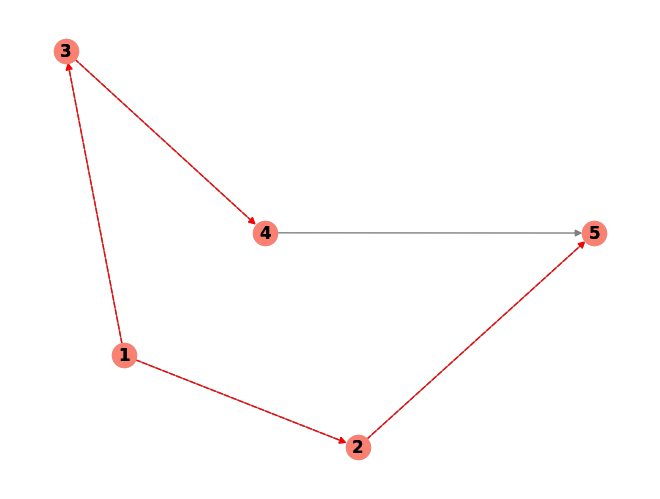

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs_tree(graph, start):
    visited = set()
    stack = [(start, None)]  # (node, parent)

    dfs_tree_edges = {}

    while stack:
        node, parent = stack.pop()

        if node not in visited:
            visited.add(node)

            if parent is not None:
                dfs_tree_edges[(parent, node)] = True

            # Explore neighbors in reverse order to match the order of the dfs_edges function
            neighbors = list(graph.neighbors(node))
            neighbors.reverse()
            stack.extend((neighbor, node) for neighbor in neighbors if neighbor not in visited)

    return dfs_tree_edges

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
# G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6), (3, 7)])
G.add_edges_from([(1, 2), (1, 3), (2, 5), (3, 4), (4, 5)])

# Manually construct DFS tree
start_node = 1
dfs_tree_edges = dfs_tree(G, start_node)

# Create a new graph with DFS tree edges
dfs_tree_graph = nx.DiGraph(list(dfs_tree_edges.keys()))

# Draw the original and DFS tree graphs to show the difference between 
# the actual graph and the traversal that has taken place for DFS
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', edge_color='gray')
nx.draw(dfs_tree_graph, pos, with_labels=True, font_weight='bold', node_color='salmon', edge_color='red', style='dashed')

plt.show()
